# Testing and regularization

- x(-1,1) : don't know how many rows so  size/1 = 40
- x(-1,2) : don't know how many rows so  size/2 = 20 
- x1**2,x2**2,x1*x2,x1,x2 = interaction True 
- x1*x2,x1,x2 = interaction false 

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

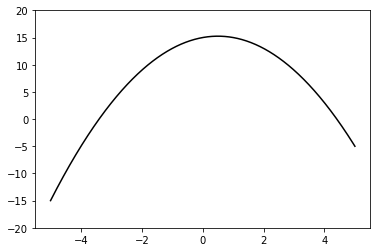

In [ ]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [ ]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

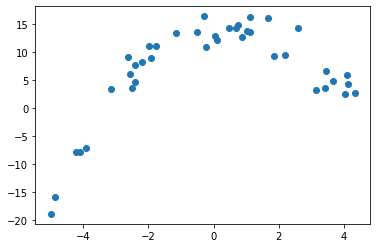

In [ ]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [ ]:
for datasample in zip(X,Y):
    print(datasample)

(3.4442185152504816, 6.685961311021467)
(-2.4108324970703663, 4.690236225597948)
(0.11274721368608542, 12.205789026637378)
(-1.9668727392107255, 11.133217991032268)
(-0.23403045847644144, 10.927272159051856)
(0.046868558173902564, 12.8584762866286)
(-2.1816215560029617, 8.16012255928749)
(-2.4949365863755943, 3.5061587527226514)
(4.097462559682402, 5.933186396721837)
(4.021659504395828, 2.454299054753137)
(-1.8985243068066735, 8.956020414039855)
(1.8398393191544127, 9.208004401915796)
(-0.2785728454728664, 16.36505651355184)
(1.1088697344380165, 16.14144978027318)
(4.130110532378982, 4.299534274468492)
(3.6530992777164, 4.83366913200435)
(-2.395076896080406, 7.723543125251446)
(-4.8595829983598104, -15.848718674227753)
(2.1970468640395415, 9.366124268570305)
(1.6815320123185087, 16.070558182542374)
(-4.988571806855717, -18.893035332565795)
(-2.5608912311286804, 6.043189895391749)
(-1.7479563725260991, 11.091071520573042)
(0.6751074062067186, 14.272553413210698)
(-2.6138407138477984, 9.

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    X = X.reshape(-1,1)
    equation = PolynomialFeatures(degree=200, include_bias=False)
    X = equation.fit_transform(X)

    return X
X_poly=addPoly(X,200)

In [ ]:
print(X_poly.shape)
print(X_poly[0,:])
#40*200

(40, 200)
[3.44421852e+000 1.18626412e+001 4.08575284e+001 1.40722256e+002
 4.84678199e+002 1.66933763e+003 5.74956356e+003 1.98027533e+004
 6.82050095e+004 2.34912956e+005 8.09091554e+005 2.78668811e+006
 9.59796279e+006 3.30574811e+007 1.13857189e+008 3.92149037e+008
 1.35064697e+009 4.65192332e+009 1.60222404e+010 5.51840971e+010
 1.90066089e+011 6.54629143e+011 2.25468581e+012 7.76563063e+012
 2.67465288e+013 9.21208897e+013 3.17284474e+014 1.09279706e+015
 3.76383187e+015 1.29634594e+016 4.46489869e+016 1.53780867e+017
 5.29654911e+017 1.82424725e+018 6.28310616e+018 2.16403906e+019
 7.45342338e+019 2.56712188e+020 8.84172871e+020 3.04528457e+021
 1.04886255e+022 3.61251182e+022 1.24422801e+023 4.28539315e+023
 1.47598304e+024 5.08360812e+024 1.75090572e+025 6.03050191e+025
 2.07703663e+026 7.15376803e+026 2.46391403e+027 8.48625832e+027
 2.92285280e+028 1.00669437e+029 3.46727540e+029 1.19420541e+030
 4.11310440e+030 1.41664303e+031 4.87922816e+031 1.68051280e+032
 5.78805329e+03

## Splitting data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly,Y,test_size=0.2)

In [ ]:
X_train.shape

(32, 200)

In [ ]:
y_train.shape

(32,)

In [ ]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [ ]:
from locale import normalize
import sklearn
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data 
# normalization trick ;)

model_no_reg = LinearRegression(normalize=True).fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Training error (rmse): 0.4121883653524476
Testing error (rmse): 1205453346.85733


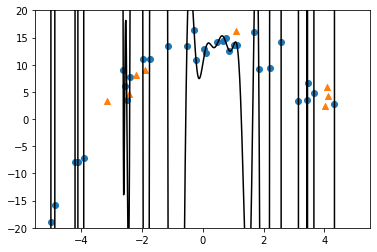

Polynomial coefficients
[10.11211608703576, 34.37989189259669, 10.440081308546098, -688.6000207157404, 1005.3539205494303, 2719.652326515194, -5708.755521971975, -2313.415508969753, 9261.77441785749, -426.63304881934556, -7053.5718972942395, 1406.9993199710855, 3009.4050179119745, -769.5304312478561, -772.3172830499026, 205.74725388900512, 120.57981882594987, -30.01160816670918, -10.8734101039746, 2.2336972727617006, 0.46108182426648453, -0.05026263538338457, 0.00022712031285422287, -0.002499937805196229, -0.00047030957517793097, 4.834920815971905e-05, -6.533326589688786e-06, 4.512237588632364e-06, 3.235792316948198e-07, 9.063679275730363e-08, 1.7489178503179488e-08, -2.1430771416976014e-09, 3.496150169266601e-10, -2.2598130512293884e-10, -3.1423560229004727e-12, -9.356562200245579e-12, -5.398294202997729e-13, -2.415482240787953e-13, -2.53753137650868e-14, -2.2934914986564818e-15, -8.25305839913755e-16, 1.7537620820542025e-16, -1.9459981452055255e-17, 1.4499229470389007e-17, -2.2200684

In [ ]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization
lasso

In [ ]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data 
# normalization trick ;)

model_L1_reg = linear_model.Lasso(alpha=0.1,normalize=True).fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


Training error (rmse): 2.0777541703020583
Testing error (rmse): 2.1040525805013406


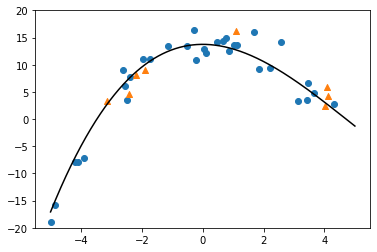

Polynomial coefficients
[13.74644634544564, 0.0, -0.9170103618948335, 0.0631623853150612, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.

In [ ]:
# will make weights = 0 so make only 2nd degree function
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization
ridge

In [ ]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data 
# normalization trick ;)

model_L2_reg = linear_model.Ridge(alpha=0.1,normalize=True).fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Training error (rmse): 2.0652943594315163
Testing error (rmse): 2.160632217938452


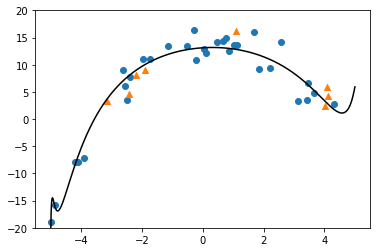

Polynomial coefficients
[13.118649654871664, 0.3596863287000029, -0.5748947790398047, 0.01689571003499322, -0.014114800211739149, 0.0008183339936526315, -0.0002838742418005904, 3.258519086408096e-05, -4.432511390388276e-06, 1.0940139393775587e-06, -2.3868531880393042e-08, 3.2344796333522814e-08, 2.1994694684771427e-09, 8.5555377155289e-10, 1.473525388340882e-10, 1.9704030593350564e-11, 6.833142807534982e-12, 3.4240363809359116e-13, 2.8100396213906236e-13, 6.04860869370592e-16, 1.0952111140579826e-14, -3.4874426226018884e-16, 4.156499155936264e-16, -2.4296043119724362e-17, 1.5564555815079104e-17, -1.250270171275662e-18, 5.791444400999808e-19, -5.718138318224563e-20, 2.1496609709457898e-20, -2.458471703629197e-21, 7.976407391704768e-22, -1.0182461478933798e-22, 2.961845971029144e-23, -4.114695865833816e-24, 1.101083394903202e-24, -1.6342214137441264e-25, 4.098230539858039e-26, -6.408398944751007e-27, 1.5268892095972371e-27, -2.4885099648914996e-28, 5.692664091478334e-29, -9.5883714887424

In [ ]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [ ]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,-3.132705,3.308124,3.684070e+06,2.805199,3.776291
1,-2.410832,4.690236,-1.212660e+01,7.531645,8.050094
2,1.108870,16.141450,1.395800e+01,12.705017,12.813209
3,-2.181622,8.160123,5.709923e+02,8.726122,9.020153
4,4.130111,4.299534,-2.643063e+09,2.554086,2.665980
5,4.097463,5.933186,-1.966956e+09,2.695714,2.840458
6,-1.898524,8.956020,-1.541126e+02,10.008957,10.027114
7,4.021660,2.454299,-8.776277e+08,3.023370,3.255102


- if u know that there are features not imp  use l1 norm
- if u don't know that there are features not imp or all imp use l2 norm
- elastic in between 